In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for 3D plots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Creating random data for PCA

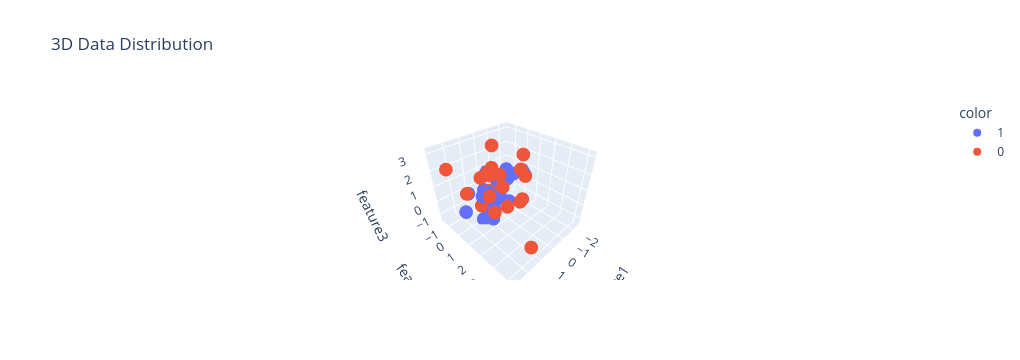

In [9]:
# Fix random seed for reproducibility
np.random.seed(23)

# Generate two classes of data
mu_vec1 = np.array([0, 0, 0])  # Mean vector for class 1
cov_mat1 = np.identity(3)       # Identity covariance matrix
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

mu_vec2 = np.array([1, 1, 1])   # Mean vector for class 2
cov_mat2 = np.identity(3)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

# Convert to DataFrame
df = pd.DataFrame(np.vstack((class1_sample, class2_sample)), 
                  columns=['feature1', 'feature2', 'feature3'])

# Assign target values: Class 1 -> 1, Class 2 -> 0
df['target'] = [1] * 20 + [0] * 20

# Shuffle the dataset
df = df.sample(frac=1, random_state=23).reset_index(drop=True)

# Plot original 3D data
fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3', 
                     color=df['target'].astype(str),
                     title="3D Data Distribution")
fig.show()


In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.331617,-1.632386,0.619114,1
1,1.010229,1.437830,2.327788,0
2,0.241106,-0.952510,-0.136267,1
3,1.676860,4.187503,-0.080565,0
4,2.823378,-0.332863,2.637391,0


# Standardizatin using sklearn

Mean after scaling: [-5.55111512e-17  4.99600361e-17 -2.22044605e-17]
Variance after scaling: [1.02564103 1.02564103 1.02564103]


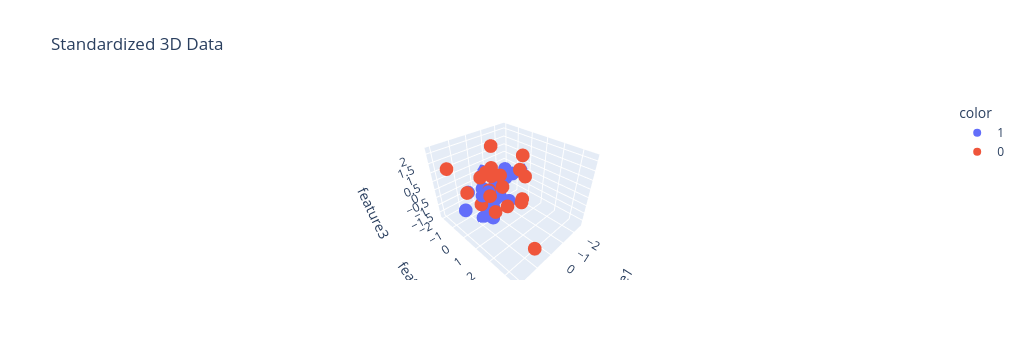

In [4]:
# Apply StandardScaler (built-in)
scaler = StandardScaler() # default stratigy = mean
df[['feature1', 'feature2', 'feature3']] = scaler.fit_transform(df[['feature1', 'feature2', 'feature3']])

# Check new mean and variance
print("Mean after scaling:", df[['feature1', 'feature2', 'feature3']].mean().values)
print("Variance after scaling:", df[['feature1', 'feature2', 'feature3']].var().values)

# Plot standardized data in 3D
fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3', 
                     color=df['target'].astype(str),
                     title="Standardized 3D Data")
fig.show()


In [5]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['feature1', 'feature2', 'feature3']])

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

# PCA to reduce 3D to 2D

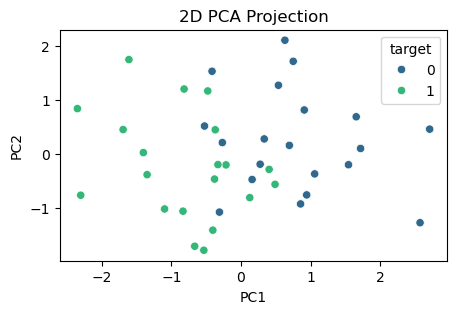

In [6]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='viridis')
plt.title("2D PCA Projection")
plt.show()

Explained Variance by PC1: 43.99%
Explained Variance by PC2: 30.73%


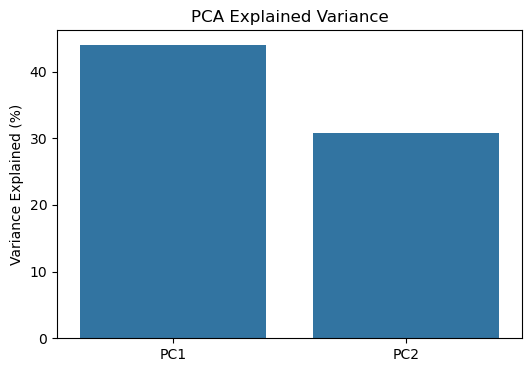

In [7]:
### Shows how much variance each principal component captures.
### Important for deciding how many components to retain.

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]*100:.2f}%")
print(f"Explained Variance by PC2: {explained_variance[1]*100:.2f}%")

plt.figure(figsize=(6,4))
sns.barplot(x=['PC1', 'PC2'], y=explained_variance*100)
plt.ylabel("Variance Explained (%)")
plt.title("PCA Explained Variance")
plt.show()


In [8]:
df_pca.head()

,PC1,PC2,target
0,-1.694055,0.454694,1
1,1.654764,0.691473,0
2,-1.349328,-0.377883,1
3,2.572050,-1.265530,0
4,1.544065,-0.194608,0
